# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

114

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
num = 0
weathers = []
for city in cities:
    num = num + 1
    try:
        print(f"{num}. {city}: Processing: ")
        query = query_url+city
        response = requests.get(query).json()
        weathers.append(response["weather"][0]["description"])
        print(response["weather"][0]["description"])
    except KeyError:
        weathers.append("city not in database")
        print("city not in database")

1. severo-kurilsk: Processing: 
scattered clouds
2. vaini: Processing: 
broken clouds
3. mahebourg: Processing: 
broken clouds
4. katsuura: Processing: 
overcast clouds
5. northam: Processing: 
broken clouds
6. san policarpo: Processing: 
scattered clouds
7. aksha: Processing: 
overcast clouds
8. rikitea: Processing: 
overcast clouds
9. tuktoyaktuk: Processing: 
light rain
10. atar: Processing: 
scattered clouds
11. sentyabrskiy: Processing: 
city not in database
12. polunochnoye: Processing: 
scattered clouds
13. atuona: Processing: 
clear sky
14. carutapera: Processing: 
few clouds
15. tasiilaq: Processing: 
scattered clouds
16. san patricio: Processing: 
broken clouds
17. hermanus: Processing: 
clear sky
18. puerto ayora: Processing: 
scattered clouds
19. provideniya: Processing: 
fog
20. hilo: Processing: 
clear sky
21. axim: Processing: 
overcast clouds
22. port alfred: Processing: 
clear sky
23. ilulissat: Processing: 
scattered clouds
24. nikolskoye: Processing: 
clear sky
25. k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
lat = []
long = []
max_temp = []
humidity = []
cloud = []
wind = []
city_country = []
date_time = []
for city in cities:
    try:
        query = query_url+city
        response = requests.get(query).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        date_time.append(response["timezone"])
    except KeyError:
        pass

In [5]:
weather_data = pd.DataFrame(long, lat, columns = ["longitude"])
weather_data = weather_data.reset_index()
weather_data = weather_data.rename(columns = {"index":"latitude"})
weather_data["max temp"] = max_temp
weather_data["humidity"] = humidity
weather_data["clouds"] = cloud
weather_data["wind speed"] = wind
weather_data["country"] = city_country
weather_data["timezone"] = date_time
weather_data

,latitude,longitude,max temp,humidity,clouds,wind speed,country,timezone
0,50.68,156.12,52.29,84,34,1.16,RU,39600
1,-21.20,-175.20,75.20,73,75,5.82,TO,46800
2,-20.41,57.70,69.80,68,75,11.41,MU,14400
3,35.13,140.30,75.99,91,100,1.99,JP,32400
4,51.03,-4.22,59.00,91,66,1.99,GB,3600
...,...,...,...,...,...,...,...,...
99,-8.14,159.59,82.58,78,67,11.54,SB,39600
100,52.27,79.17,58.57,82,0,3.44,RU,25200
101,9.18,105.15,77.36,87,73,1.07,VN,25200
102,-33.93,18.42,55.00,100,0,2.24,ZA,7200


In [6]:
weather_data.to_csv("weather.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid = []
ind = 0
for city in cities:
    try:
        query = query_url+city
        response = requests.get(query).json()
        if response["main"]["humidity"] > 100:
            no_humid.append(ind)
        ind = ind + 1
    except KeyError:
        pass
humid

[]

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#No Humid Values over 100

In [28]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv


#No Humid Values over 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

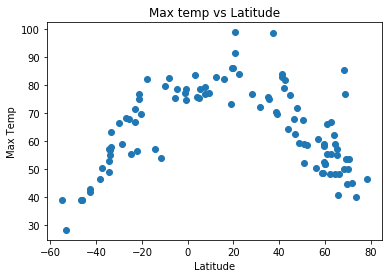

In [8]:
plt.scatter(weather_data["latitude"], weather_data["max temp"])
plt.title("Max temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("lat_vs_temp.png")

In [9]:
# As latitude approaches 0, the max temp rises. This makes sense, given that the equator is the most pronounced 
#towards to sun

## Latitude vs. Humidity Plot

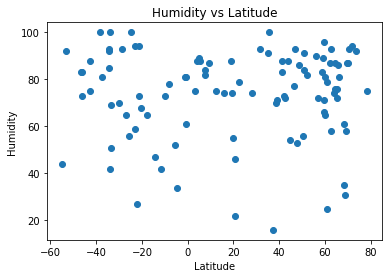

In [10]:
plt.scatter(weather_data["latitude"], weather_data["humidity"])
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("lat_vs_humidity.png")

In [11]:
#No clear relationship between humidity and latitude

## Latitude vs. Cloudiness Plot

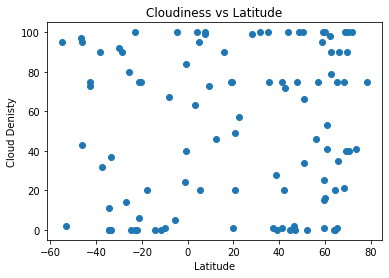

In [12]:
plt.scatter(weather_data["latitude"], weather_data["clouds"])
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Denisty")
plt.savefig("lat_vs_cloud.png")

In [13]:
# No clear relationship, although noticeable skew of values toward poles, i.e. the 0 and 100 % cloudiness

## Latitude vs. Wind Speed Plot

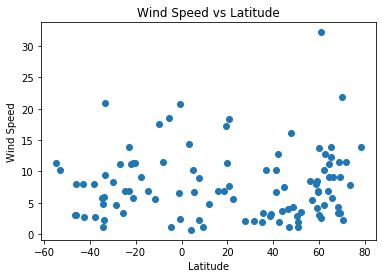

In [14]:
plt.scatter(weather_data["latitude"], weather_data["wind speed"])
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("lat_vs_wind.png")

In [15]:
#no clear realtionship, although wind speed seems skewed towards lower/0 speed

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_data[weather_data['latitude'] > 0]
south = weather_data[weather_data['latitude'] < 0]
north

,latitude,longitude,max temp,humidity,clouds,wind speed,country,timezone
0,50.68,156.12,52.29,84,34,1.16,RU,39600
3,35.13,140.30,75.99,91,100,1.99,JP,32400
4,51.03,-4.22,59.00,91,66,1.99,GB,3600
5,12.18,125.51,82.81,75,46,4.79,PH,28800
6,50.28,113.29,67.48,56,100,2.93,RU,32400
...,...,...,...,...,...,...,...,...
96,20.89,-156.47,91.40,46,20,18.34,US,-36000
97,78.22,15.64,46.40,75,75,13.87,SJ,7200
98,38.52,-28.70,70.54,70,28,2.80,PT,0
100,52.27,79.17,58.57,82,0,3.44,RU,25200


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.52x +90.34


AttributeError: module 'matplotlib.pyplot' has no attribute 'annnotate'

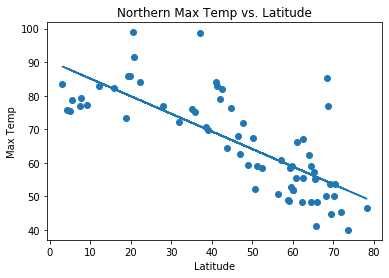

In [20]:
plt.scatter(north["latitude"], north["max temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["latitude"], north["max temp"])
regress_values = north["latitude"] * slope + intercept
plt.plot(north["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(mxb)
plt.savefig("Temp_lat_north_linregress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.88x +85.4


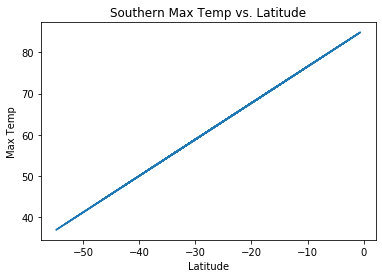

In [63]:
plt.scatter(south["latitude"], south["max temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["latitude"], south["max temp"])
regress_values = south["latitude"] * slope + intercept
plt.plot(south["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(mxb)
plt.savefig("Temp_lat_south_linregress.png")

In [ ]:
#As seen in the scatter plot, the max temp rises towards 0. As such, it drops as the first graph departs 0, 
#and rises as the second approaches

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.02x +76.01


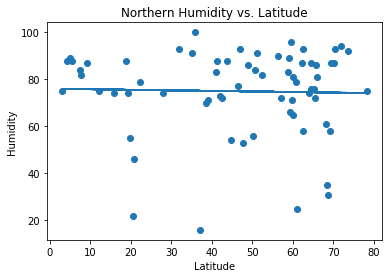

In [25]:
plt.scatter(north["latitude"], north["humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["latitude"], north["humidity"])
regress_values = north["latitude"] * slope + intercept
plt.plot(north["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(mxb)
plt.savefig("Humidity_lat_north_linregress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.38x +61.92


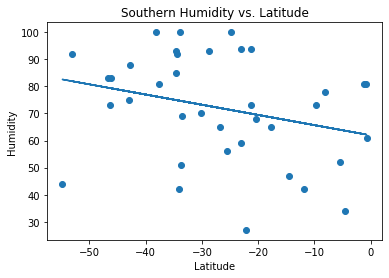

In [26]:
plt.scatter(south["latitude"], south["humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["latitude"], south["humidity"])
regress_values = south["latitude"] * slope + intercept
plt.plot(south["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(mxb)
plt.savefig("Humidty_lat__south_linregress.png")

In [ ]:
#There was no distinct relationship between humidity and latitude, and the results above are lowly correlated negative 
#trends toward the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.18x +64.46


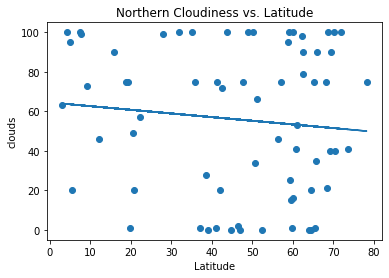

In [27]:
plt.scatter(north["latitude"], north["clouds"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["latitude"], north["clouds"])
regress_values = north["latitude"] * slope + intercept
plt.plot(north["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("clouds")
print(mxb)
plt.savefig("cloud_lat_north_linregress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.37x +31.23


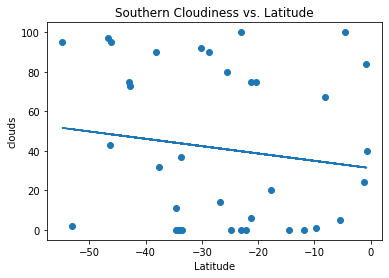

In [29]:
plt.scatter(south["latitude"], south["clouds"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["latitude"], south["clouds"])
regress_values = south["latitude"] * slope + intercept
plt.plot(south["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("clouds")
print(mxb)
plt.savefig("clouds_lat_south_linregress.png")

In [ ]:
#Same as with humidity, cloudiness yields two low 'r' values showing negative trends towards the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x +5.97


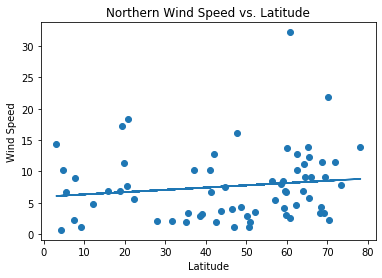

In [30]:
plt.scatter(north["latitude"], north["wind speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["latitude"], north["wind speed"])
regress_values = north["latitude"] * slope + intercept
plt.plot(north["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Northern Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(mxb)
plt.savefig("wind_lat__north_linregress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.09x +10.56


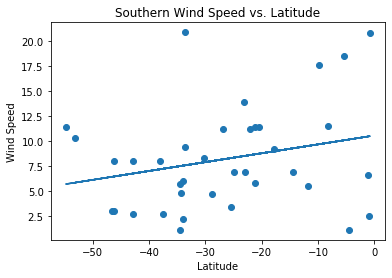

In [31]:
plt.scatter(south["latitude"], south["wind speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["latitude"], south["wind speed"])
regress_values = south["latitude"] * slope + intercept
plt.plot(south["latitude"], regress_values)
mxb = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.title("Southern Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(mxb)
plt.savefig("wind_lat__south_linregress.png")

In [ ]:
#Same as the other two, the only difference being that the slope is even lower, as there was such a skew on the scatter
#plot toward the low/0 region of wind speed